<a href="https://colab.research.google.com/github/Zaine-eng/Curso-Deep-Learning/blob/main/L03_Perceptron_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. L03 - Perceptrons**

implementation of the classic perceptrom by Frank Roserblatt for binary classification(there: 0/1 class labels)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


*Attention, you should always indicate the database path before executing the codes.*

## **1.1 Preparing a dataset**

In [29]:
# DATASET 
data01 = pd.read_excel('/content/Deep Learning - L03 O Perceptron- data.xlsx')
data01.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   y       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [28]:
data = np.asarray(data01)

In [63]:
x = data[:, :2]
y = data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('x.shape:', x.shape)
print('y.shape:', y.shape)

Class label counts: [50 50]
x.shape: (100, 2)
y.shape: (100,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


*shuffle() is a built-in method of the random module.
It is used to shuffle a sequence (list). To shuffle means to change the position of the elements of the sequence.*

In [64]:
# shuffling & train/test split 
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
x, y = x[shuffle_idx], y[shuffle_idx]

x_train = x[shuffle_idx[:70]]
x_test = x[shuffle_idx[70:]]
y_train = y[shuffle_idx[:70]]
y_test = y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu = x_train.mean(axis=0)
sigma = x_train.std(axis=0)
x_train = (x_train - mu) / sigma
x_test = (x_test -mu) / sigma

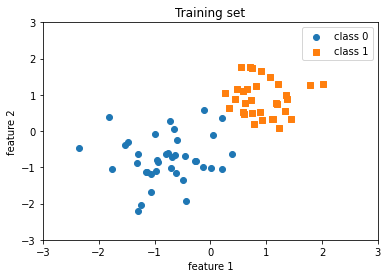

In [65]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0,1], label = 'class 0', marker ='o')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1,1], label = 'class 1', marker ='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

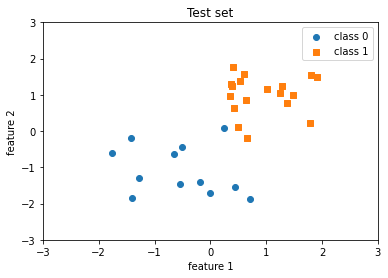

In [66]:
plt.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

# **2. Defining the Perceptron model**

In [67]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy


# **3. Training the Perceptron**

In [68]:
ppn = Perceptron(num_features=2)

ppn.train(x_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Model parameters:


  Weights: [[1.27340847]
 [1.34642288]]

  Bias: [-1.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


# **4. Evaluating the model**

In [69]:
test_acc = ppn.evaluate(x_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


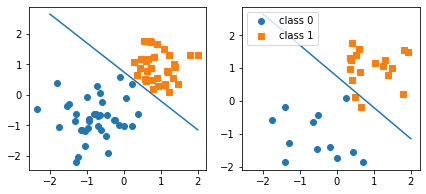

In [70]:

# 2D Decision Boundary

w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()